In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import datasets
from tensorflow.keras.optimizers import SGD 
from tensorflow.keras.layers import Dense, Flatten, Reshape


In [2]:
class Encoder(Model):
    def __init__(self):
        super(Encoder, self).__init__()
        self.flatten = Flatten(input_shape=(28, 28))
        self.dense_1 = Dense(400, activation='relu')
        self.dense_2 = Dense(200, activation='relu')
        self.dense_3 = Dense(100, activation='relu')
        self.dense_4 = Dense(50,  activation='relu')
        self.dense_5 = Dense(25,  activation='relu')

    def call(self, x):
        x = self.flatten(x)
        x = self.dense_1(x)
        x = self.dense_2(x)
        x = self.dense_3(x)
        x = self.dense_4(x)

        return self.dense_5(x)

In [3]:
class Decoder(Model):
    def __init__(self):
        super(Decoder, self).__init__()
        self.dense_1 = Dense(50,   activation='relu', input_shape=[25])
        self.dense_2 = Dense(100,  activation='relu')
        self.dense_3 = Dense(200,  activation='relu')
        self.dense_4 = Dense(400,  activation='relu')
        self.dense_5 = Dense(784,  activation='sigmoid')
        self.reshape = Reshape([28, 28])

    def call(self, x):
        x = self.dense_1(x)
        x = self.dense_2(x)
        x = self.dense_3(x)
        x = self.dense_4(x)
        x = self.dense_5(x)

        return self.reshape(x)

In [4]:
class Autoencoder(Model):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()
  
    def call(self, input_features):
        code = self.encoder(input_features)
        reconstructed = self.decoder(code)
        return reconstructed

In [6]:
autoencoder = Autoencoder()


In [7]:
autoencoder.compile(loss= 'mean_squared_error',
                    optimizer= SGD(1.5),
                    metrics=['accuracy'])

In [8]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [10]:
autoencoder.fit(X_train, X_train,
                epochs= 5)

Epoch 1/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0294 - accuracy: 0.2025
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0270 - accuracy: 0.2113
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0251 - accuracy: 0.2189
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0238 - accuracy: 0.2243
Epoch 5/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0228 - accuracy: 0.2284


In [11]:
X_keras_autoencoder = autoencoder.predict(X_test[:10])


In [12]:
def plotter(data, title):
    fig = plt.figure(figsize=(12, 6))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(10):
        ax = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        ax.imshow(data[i], 
                cmap=plt.cm.binary, interpolation='nearest')
    ax.yaxis.set_label_position("right")
    ax.set_ylabel(title, fontsize='medium')

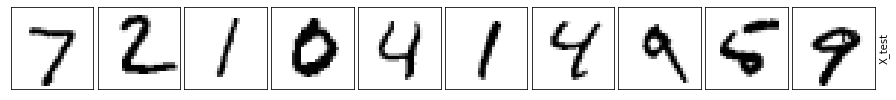

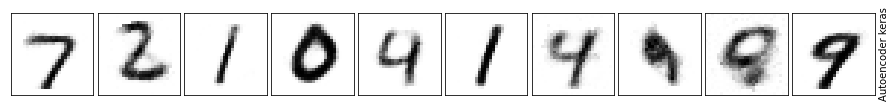

In [13]:
plotter(X_test,'X_test')
plotter(X_keras_autoencoder,'Autoencoder keras')